In [24]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
iris=datasets.load_iris()

In [11]:
iris.data.shape

(150, 4)

In [14]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [15]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
iris_df['target']=iris.target

In [17]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


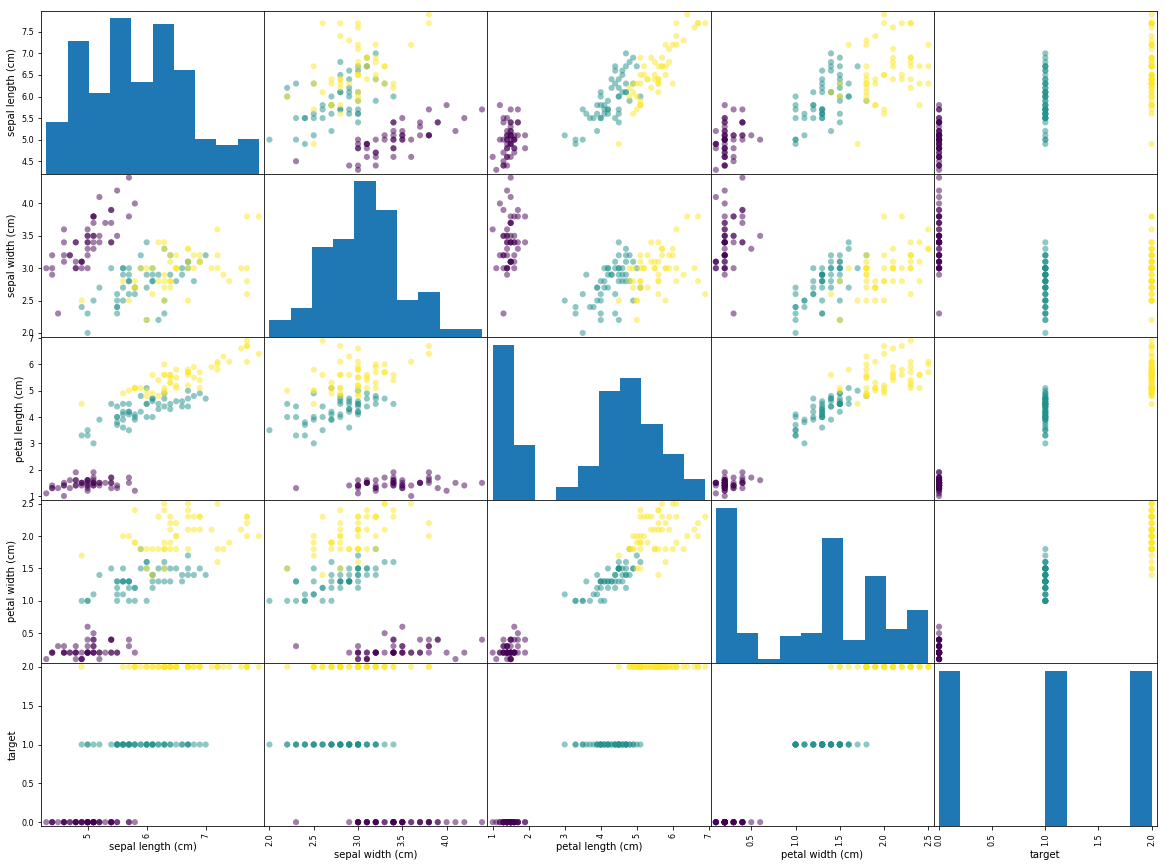

In [29]:
pd.plotting.scatter_matrix(iris_df,c=iris.target,s=150,figsize=[20,15])
plt.show()

In [30]:
x=iris.data
y=iris.target
print(x[2],y[2])

[4.7 3.2 1.3 0.2] 0


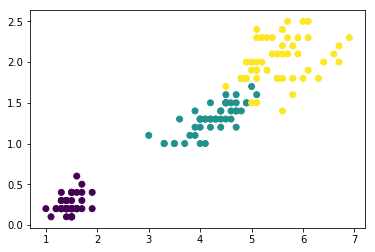

In [36]:
x=iris.data[:,[2,3]]
y=iris.target
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [38]:
#train phase with KNN
#--------------------
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
x=iris.data
y=iris.target

knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [55]:
#split test and train datasets

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [61]:
#train model

In [81]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
#model_accuracy
knn.score(x_test,y_test)

0.9777777777777777

In [67]:
#predict_new_sample
x_new_flower=([[2,3,5,1.8]])
y_new_flower=knn.predict(x_new_flower)
y_new_flower

array([1])

In [84]:
neighbors=np.arange(1,30)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [85]:
for i,k in enumerate(neighbors):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)
    train_accuracy[i]=knn_model.score(x_train,y_train)
    test_accuracy[i]=knn_model.score(x_test,y_test)
    
    

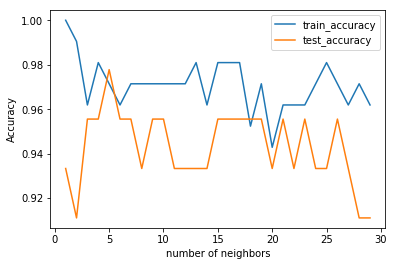

In [86]:
plt.plot(neighbors,train_accuracy,label='train_accuracy')
plt.plot(neighbors,test_accuracy,label='test_accuracy')
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("Accuracy")
plt.show()


In [87]:
#using Decision_Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [97]:
dtc=DecisionTreeClassifier()

In [98]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
predict_dtc=dtc.predict(x_test)

In [100]:
metrics.accuracy_score(y_test,predict_dtc)

0.9333333333333333

In [101]:
dtc.score(x_test,y_test)

0.9333333333333333